<a href="https://colab.research.google.com/github/DaruHashida/MyPyTorch/blob/main/01_exercise_pytorch_ml_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# Device agnostic code

device = "cuda" if torch.cuda.is_available() else "cpu"

##LET'S CREATE A DATASET
weight = 0.3
bias = 0.9

#Creating set of numbers
start = 0
end = 2
step = 0.1
X = torch.arange(start,end,step).unsqueeze(1)
y = X*weight + bias

#Creating training and testing batches
proportion = int(len(X)*0.8)
X_train, y_train = X[:proportion], y[:proportion]
X_test, y_test = X[proportion:], y[proportion:]

In [ ]:
#Plot the data
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None
                     ):
  #Creating plot background
  plt.figure(figsize=(7,7))

  plt.scatter(train_data, train_labels, s=2, c='purple', label='Training dataset')

  plt.scatter(test_data, test_labels, s=2, c='blue', label='Testing dataset')

  if predictions is not None:
    #Plot the predictions if they exist
    plt.scatter(test_data,predictions, c="r", s=2, label="Predictions")

  #Show the legend
  plt.legend(prop={"size":14});


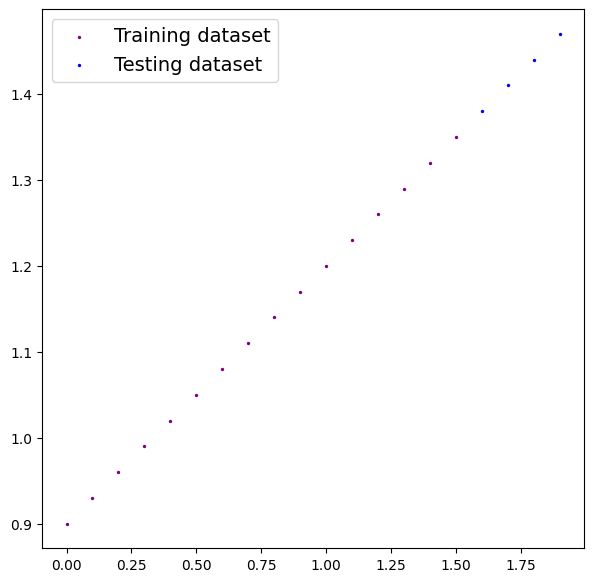

In [ ]:
plot_predictions()

In [ ]:
#Let's build the model

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
  def forward(self,x: torch.Tensor) -> torch.Tensor:
    return self.weights*x + self.bias

In [ ]:
model = LinearRegressionModel()
model.to(device)
model.state_dict()

OrderedDict([('weights', tensor([-0.0808], device='cuda:0')),
             ('bias', tensor([0.5201], device='cuda:0'))])

In [ ]:
#Create loss function
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(),
                            lr=0.01)

In [ ]:
epochs = 20000
#Removing data on device
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)
#Training loop

for epoch in range(epochs):
  model.train()
  y_pred = model(X_train)
  loss = loss_fn(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  #Testing loop

  model.eval()
  with torch.inference_mode():
    test_pred = model(X_test)
    test_loss = loss_fn(test_pred,y_test)
    loss_value = loss_fn(y_pred,y_train)
  if epoch % 10 == 0:
    print(f"Epoch:{epoch}| Loss: {loss_value} | Test_loss:{test_loss}")

Epoch:0| Loss: 0.6654196977615356 | Test_loss:1.0230472087860107
Epoch:10| Loss: 0.5091697573661804 | Test_loss:0.7917972803115845
Epoch:20| Loss: 0.35291987657546997 | Test_loss:0.560547411441803
Epoch:30| Loss: 0.19666999578475952 | Test_loss:0.32929757237434387
Epoch:40| Loss: 0.04737881198525429 | Test_loss:0.10642263293266296
Epoch:50| Loss: 0.014106877148151398 | Test_loss:0.026235193014144897
Epoch:60| Loss: 0.004645939916372299 | Test_loss:0.00876644253730774
Epoch:70| Loss: 0.00676732137799263 | Test_loss:0.015860170125961304
Epoch:80| Loss: 0.00676732137799263 | Test_loss:0.015860170125961304
Epoch:90| Loss: 0.00676732137799263 | Test_loss:0.015860170125961304
Epoch:100| Loss: 0.00676732137799263 | Test_loss:0.015860170125961304
Epoch:110| Loss: 0.00676732137799263 | Test_loss:0.015860170125961304
Epoch:120| Loss: 0.00676732137799263 | Test_loss:0.015860170125961304
Epoch:130| Loss: 0.00676732137799263 | Test_loss:0.015860170125961304
Epoch:140| Loss: 0.00676732137799263 | Te

In [ ]:
with torch.inference_mode():
  y_preds = model(X_test)

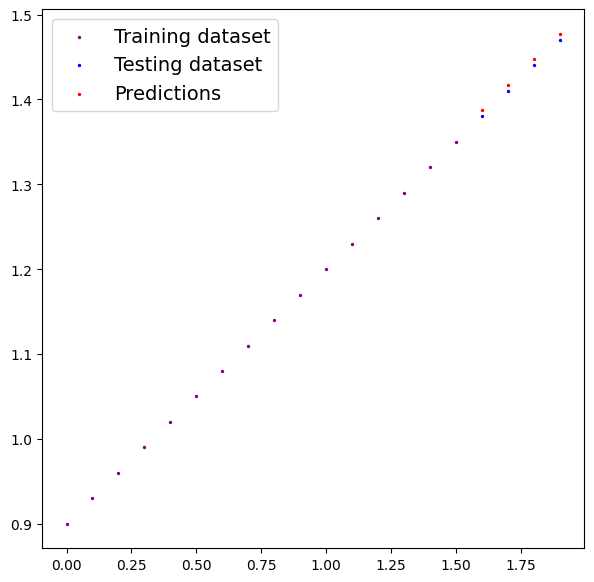

In [ ]:
plot_predictions(predictions=y_preds.cpu())

In [ ]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok = True)

MODEL_NAME = "01_pytorch_homework.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

PosixPath('models/01_pytorch_homework.pth')

In [ ]:
torch.save(f=MODEL_SAVE_PATH, obj = model.state_dict())

In [ ]:
loaded_model = LinearRegressionModel()
loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH))

loaded_model = loaded_model.to(device)

model.state_dict()

OrderedDict([('weights', tensor([0.3005], device='cuda:0')),
             ('bias', tensor([0.9064], device='cuda:0'))])

In [ ]:
loaded_model.state_dict()

OrderedDict([('weights', tensor([0.3005], device='cuda:0')),
             ('bias', tensor([0.9064], device='cuda:0'))])